In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df=pd.read_csv("Algerian_Dataset.csv")

In [45]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [47]:
### Since day, year,month doesn't play a major role in prediction, hence removing them

In [48]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [49]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [50]:
### Encoding the catagories of Class column

In [51]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [52]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [53]:
### Dividing dataset into Independent and Dependent features
# Let's say we are predicting FWI feature

In [54]:
X=df.drop('FWI',axis=1)
y=df['FWI']
X.shape,y.shape

((243, 11), (243,))

In [55]:
##Performing Train-Test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [58]:
corr=X_train.corr()

<Axes: >

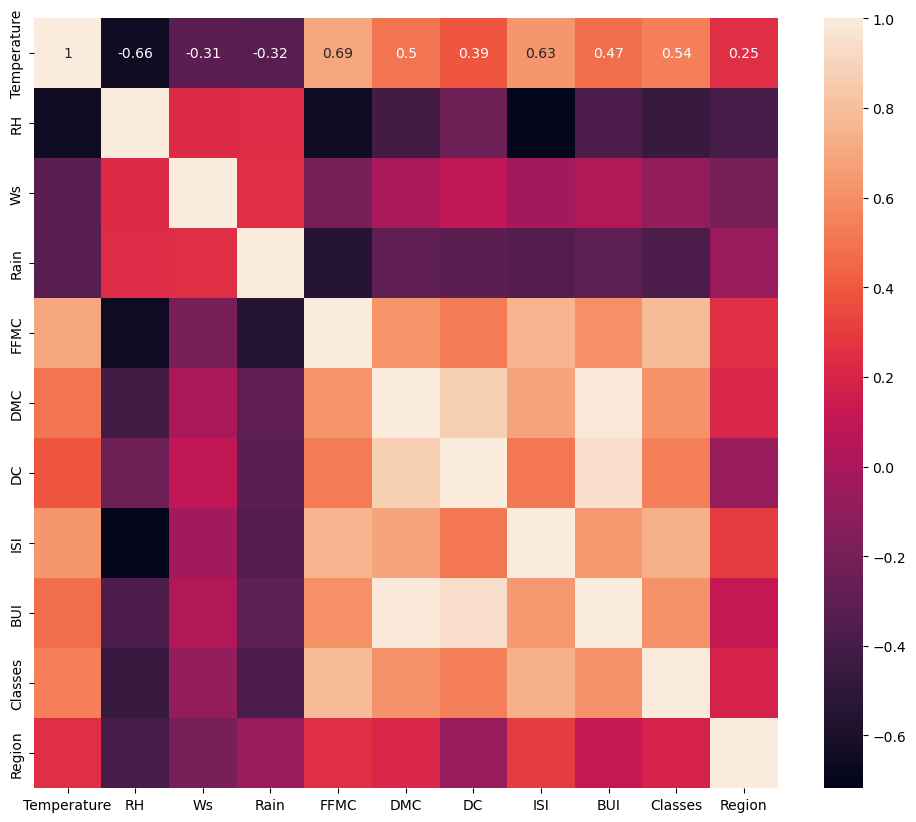

In [59]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(X_train.corr(),annot=True)


In [60]:
### Writing a function to avoid multicollinearity

In [61]:
def correlation(dataset,threshold):
    corr_columns=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                corr_columns.add(col_name)
    return corr_columns

In [62]:
corr_features=correlation(X_train,0.85)

In [63]:
corr_features

{'BUI', 'DC'}

In [64]:
### Dropping features when correlation>85%

In [65]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [66]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

#### Feature Scaling or Standardisation

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()

In [69]:
X_train_scaled=scaler.fit_transform(X_train)

In [70]:
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

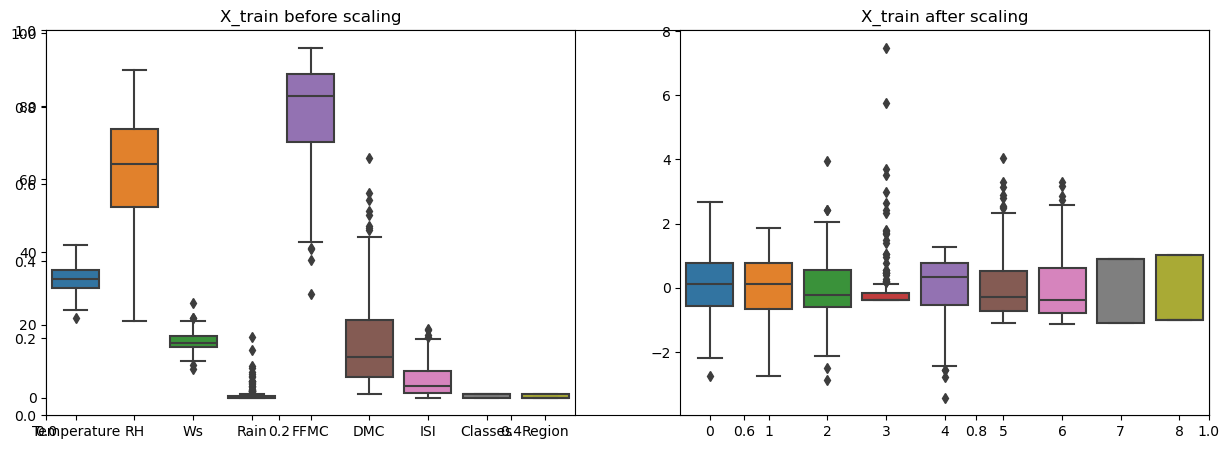

In [79]:
### Box plot to understand the effect of standardisation
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train after scaling")

## Linear Regression Model

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lin_regressor=LinearRegression()

In [82]:
lin_regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [83]:
y_pred=lin_regressor.predict(X_test_scaled)

In [84]:
### Calculating error and accuracy wrt this model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [85]:
mean_absolute_error(y_test,y_pred)

0.5468236465249977

In [86]:
r2_score(y_test,y_pred)

0.9847657384266952

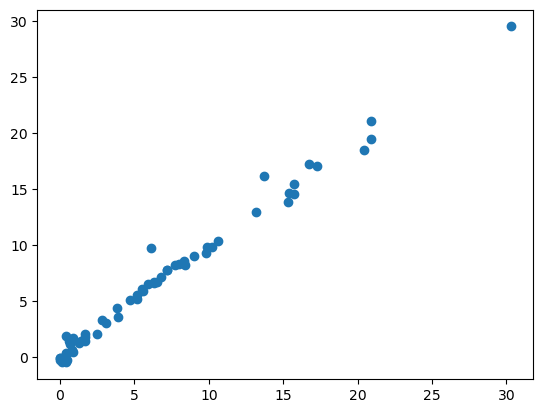

In [87]:
plt.scatter(y_test,y_pred)

In [88]:
### Linear graph. Very good model

## Lasso Regression

In [89]:
from sklearn.linear_model import Lasso

In [90]:
lasso=Lasso()

In [91]:
lasso.fit(X_train_scaled,y_train)

Lasso()

In [92]:
y_pred=lasso.predict(X_test_scaled)

In [93]:
### Mae and R2 score
mean_absolute_error(y_test,y_pred)

1.1331759949144087

In [94]:
r2_score(y_test,y_pred)

0.9492020263112388

### Lasso Cross Validation

Mean absolute error for lassocv: 0.6199701158263436
R2_score for lassocv model is: 0.9820946715928274


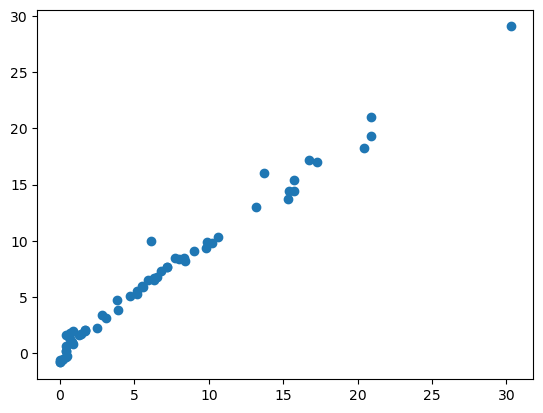

In [98]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error for lassocv:",mae)
print('R2_score for lassocv model is:',score)
plt.scatter(y_test,y_pred)

### Ridge regression

Mean absolute error for ridge: 0.5642305340105683
R2_score for ridge model is: 0.9842993364555513


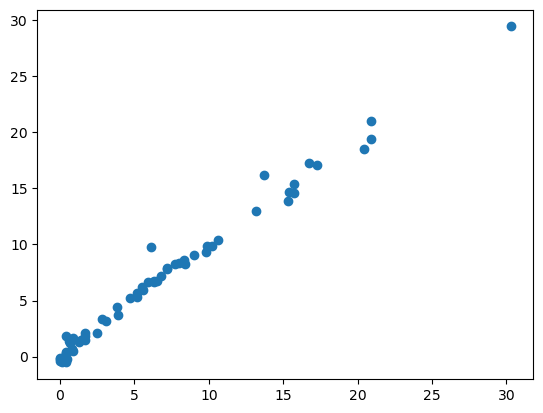

In [99]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error for ridge:",mae)
print('R2_score for ridge model is:',score)
plt.scatter(y_test,y_pred)

### Cross validation with Ridge

Mean absolute error for ridgecv: 0.5642305340108171
R2_score for ridgecv model is: 0.9842993364555515


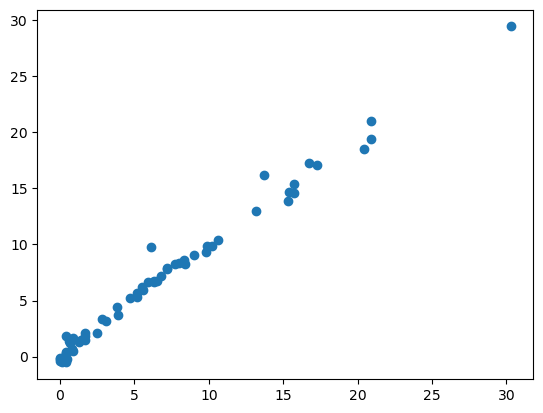

In [100]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error for ridgecv:",mae)
print('R2_score for ridgecv model is:',score)
plt.scatter(y_test,y_pred)

In [102]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elastic Net Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


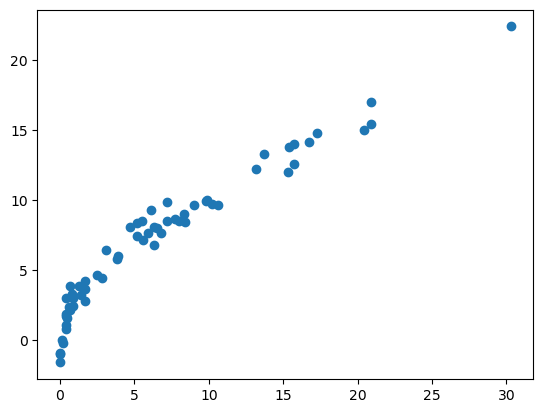

In [103]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Elastic Net CV

Mean absolute error 0.6575946731430902
R2 Score 0.9814217587854941


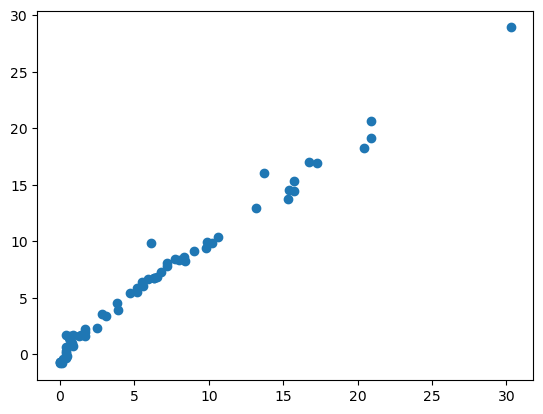

In [104]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [108]:
elasticcv.alphas_

array([1.41170600e+01, 1.31656174e+01, 1.22782989e+01, 1.14507826e+01,
       1.06790382e+01, 9.95930678e+00, 9.28808283e+00, 8.66209714e+00,
       8.07830078e+00, 7.53385034e+00, 7.02609405e+00, 6.55255882e+00,
       6.11093829e+00, 5.69908150e+00, 5.31498248e+00, 4.95677045e+00,
       4.62270071e+00, 4.31114616e+00, 4.02058933e+00, 3.74961507e+00,
       3.49690356e+00, 3.26122397e+00, 3.04142839e+00, 2.83644629e+00,
       2.64527931e+00, 2.46699633e+00, 2.30072904e+00, 2.14566760e+00,
       2.00105679e+00, 1.86619226e+00, 1.74041714e+00, 1.62311885e+00,
       1.51372607e+00, 1.41170600e+00, 1.31656174e+00, 1.22782989e+00,
       1.14507826e+00, 1.06790382e+00, 9.95930678e-01, 9.28808283e-01,
       8.66209714e-01, 8.07830078e-01, 7.53385034e-01, 7.02609405e-01,
       6.55255882e-01, 6.11093829e-01, 5.69908150e-01, 5.31498248e-01,
       4.95677045e-01, 4.62270071e-01, 4.31114616e-01, 4.02058933e-01,
       3.74961507e-01, 3.49690356e-01, 3.26122397e-01, 3.04142839e-01,
      